<a href="https://colab.research.google.com/github/raguram/eva/blob/master/S8/CIFAR10_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount the drive and load required modules

In [23]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT, force_remount=True)

LIBRARY_ROOT = "/content/drive/My Drive/Colab Notebooks/workspace/cnn-lib/"

from importlib.machinery import SourceFileLoader

SourceFileLoader('Utility', join(LIBRARY_ROOT, 'Utility.py')).load_module()
SourceFileLoader('DataUtility', join(LIBRARY_ROOT, 'DataUtility.py')).load_module()
SourceFileLoader('CIFAR10Net', join(LIBRARY_ROOT, 'CIFAR10Net.py')).load_module()
SourceFileLoader('MetricsUtility', join(LIBRARY_ROOT, 'MetricsUtility.py')).load_module()
SourceFileLoader('ModelBuilder', join(LIBRARY_ROOT, 'ModelBuilder.py')).load_module()
SourceFileLoader('LossFunctionUtility', join(LIBRARY_ROOT, 'LossFunctionUtility.py')).load_module()
SourceFileLoader('Resnet', join(LIBRARY_ROOT, 'Resnet.py')).load_module()

print("Loaded the required modules")

Mounted at /content/drive
Loaded the required modules


In [0]:
from torchvision import datasets, transforms
from ModelBuilder import ModelTester
import torch
import Utility 
import DataUtility
import MetricsUtility
import ModelBuilder
from LossFunctionUtility import LossFn
import torch.nn.functional as F
import torch.optim as optim
from ModelBuilder import ModelBuilder
import Resnet
import torch.nn as nn

### Load the data and perform required transformations

Files already downloaded and verified
Files already downloaded and verified
Shape of a train data batch: torch.Size([128, 3, 32, 32])
Shape of a test data batch: torch.Size([128, 3, 32, 32])
Number of train images: 50000
Number of test images: 10000


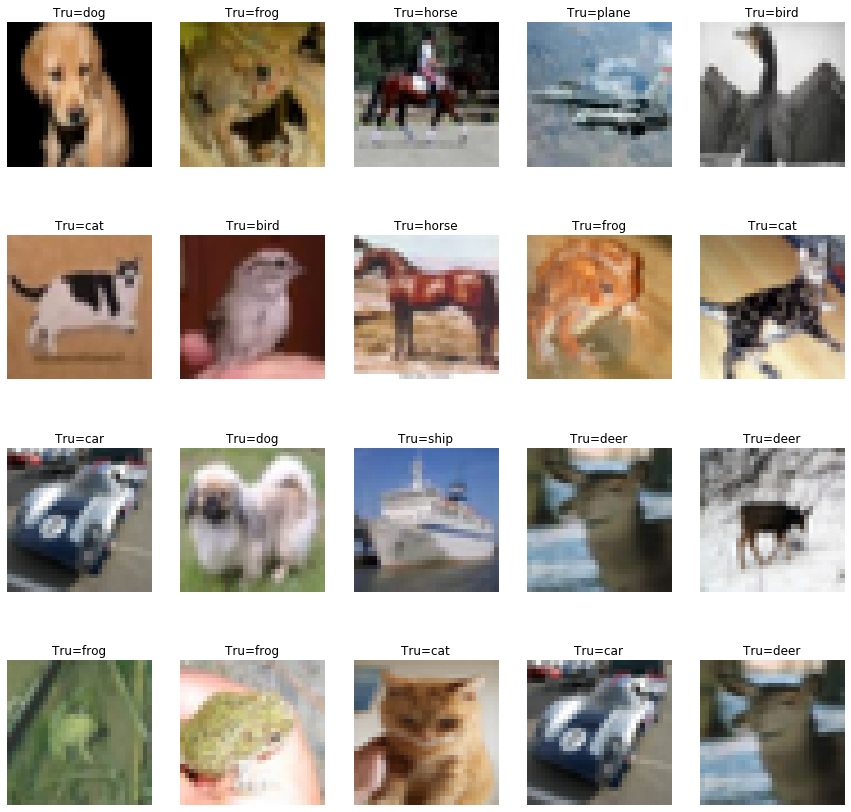

In [32]:
train_transforms = transforms.Compose([
                    transforms.RandomHorizontalFlip(),          
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                    ])
  
test_transforms = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data=DataUtility.download_CIFAR10(train_transforms,test_transforms)
DataUtility.showLoaderImages(data.train, count=20, classes=data.classes, muSigmaPair=(0.5, 0.5))

## Initialize the network and view the summary

In [26]:
from torchsummary import summary
summary(Resnet.ResNet18().to(Utility.getDevice()), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Train the network

In [27]:
net = Resnet.ResNet18().to(Utility.getDevice())
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum=0.9)
builder = ModelBuilder(net, data, LossFn(nn.CrossEntropyLoss()), optimizer)
result = builder.fit(20)



Epoch: 1


Train Accuracy: 53.582%, Train Loss: 0.010041417554020882


Test Accuracy: 64.01%, Test Loss: 0.008259575814008713


Epoch: 2


Train Accuracy: 73.256%, Train Loss: 0.005938934627920389


Test Accuracy: 74.45%, Test Loss: 0.005758710205554962


Epoch: 3


Train Accuracy: 79.932%, Train Loss: 0.00445757107809186


Test Accuracy: 77.72%, Test Loss: 0.005122680217027664


Epoch: 4


Train Accuracy: 84.56%, Train Loss: 0.003501075552776456


Test Accuracy: 78.7%, Test Loss: 0.0051502869464457035


Epoch: 5


Train Accuracy: 87.306%, Train Loss: 0.002862894907593727


Test Accuracy: 82.59%, Test Loss: 0.004006955306977034


Epoch: 6


Train Accuracy: 89.412%, Train Loss: 0.0023782560601830482


Test Accuracy: 81.35%, Test Loss: 0.004660780541598797


Epoch: 7


Train Accuracy: 91.388%, Train Loss: 0.001956003485247493


Test Accuracy: 82.23%, Test Loss: 0.004259582608938217


Epoch: 8


Train Accuracy: 92.812%, Train Loss: 0.0016331265214830637


Test Accuracy: 83.66%, Test Loss: 0.004389946348965168


Epoch: 9


Train Accuracy: 94.024%, Train Loss: 0.0013601493556052446


Test Accuracy: 82.38%, Test Loss: 0.004751837812364101


Epoch: 10


Train Accuracy: 95.266%, Train Loss: 0.0010781739838421345


Test Accuracy: 82.73%, Test Loss: 0.004706897772848606


Epoch: 11


Train Accuracy: 95.98%, Train Loss: 0.0009007052285596728


Test Accuracy: 83.53%, Test Loss: 0.004646606277674437


Epoch: 12


Train Accuracy: 96.766%, Train Loss: 0.0007520736544393003


Test Accuracy: 81.66%, Test Loss: 0.005797568242996931


Epoch: 13


Train Accuracy: 97.54%, Train Loss: 0.0005779885104857385


Test Accuracy: 82.8%, Test Loss: 0.005491781514137983


Epoch: 14


Train Accuracy: 97.798%, Train Loss: 0.0005023801932111382


Test Accuracy: 85.37%, Test Loss: 0.0047856406308710575


Epoch: 15


Train Accuracy: 97.668%, Train Loss: 0.0005277877789922059


Test Accuracy: 85.1%, Test Loss: 0.004561832640320063


Epoch: 16


Train Accuracy: 98.222%, Train Loss: 0.0003994510043412447


Test Accuracy: 82.14%, Test Loss: 0.006409510038793087


Epoch: 17


Train Accuracy: 98.532%, Train Loss: 0.0003348344471305609


Test Accuracy: 85.56%, Test Loss: 0.005110342986881733


Epoch: 18


Train Accuracy: 98.744%, Train Loss: 0.0002823088434524834


Test Accuracy: 85.93%, Test Loss: 0.004919928032904863


Epoch: 19


Train Accuracy: 98.9%, Train Loss: 0.000256769941188395


Test Accuracy: 85.1%, Test Loss: 0.005350762978196144


Epoch: 20


Train Accuracy: 99.088%, Train Loss: 0.00021334629855118692


Test Accuracy: 85.62%, Test Loss: 0.0053961193189024925


## Plot metrics and loss

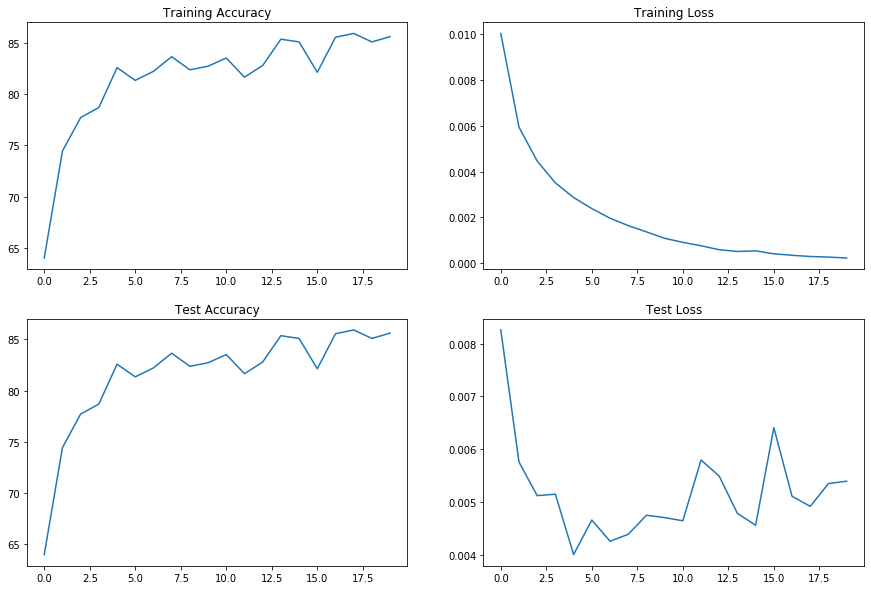

In [28]:
MetricsUtility.plotMetrics(result)

## View miss classified images

[[900   9  29   1   6   2   0   2  41  10]
 [ 10 927   5   1   0   0   0   0  23  34]
 [ 33   0 857  13  35  38   9   5   9   1]
 [ 20   5  74 646  48 138   9  16  29  15]
 [ 16   4  57  24 832  34   5  17   8   3]
 [  4   3  29  77  17 848   0  12   9   1]
 [  7   5  67  56  24  28 780   5  23   5]
 [  8   1  22  12  37  47   0 855  10   8]
 [ 32   7   7   3   1   0   1   0 937  12]
 [ 14  26   6   0   0   2   1   2  20 929]]


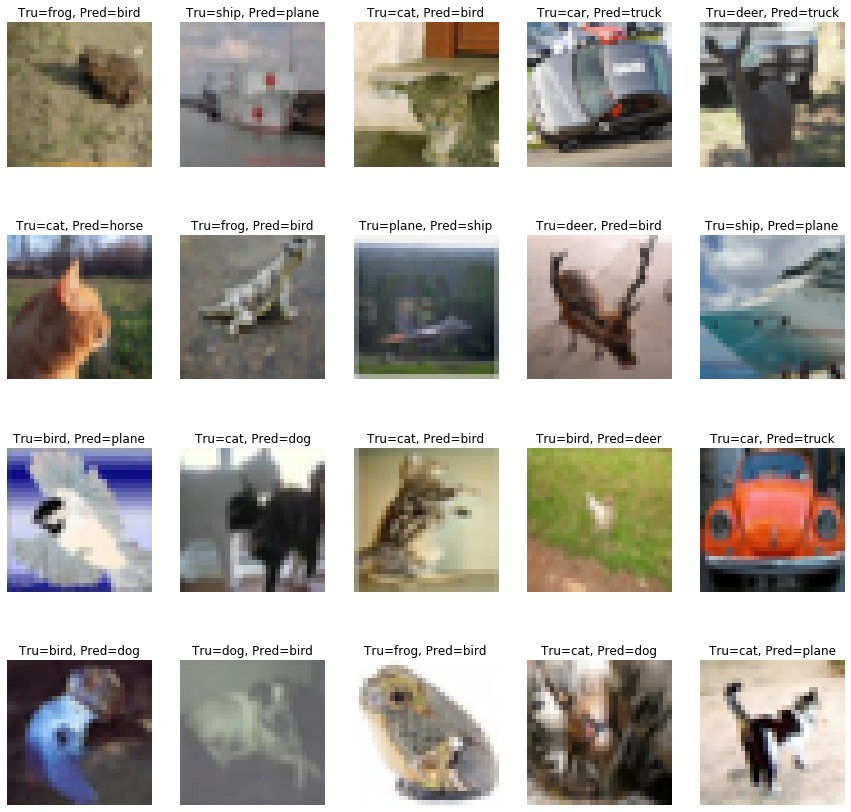

In [29]:
cpu = torch.device("cpu")
testResult = ModelTester().test(net, data.test, LossFn(F.nll_loss))
metrics = MetricsUtility.computeMetrics(testResult.data, testResult.predictions, testResult.targets)
DataUtility.showRandomImages(metrics.miss_classified_data.to(cpu), metrics.miss_classified_targets.to(cpu), metrics.miss_classified_predictions.to(cpu), data.classes, muSigmaPair=(0.5, 0.5))